In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
csfont = {'fontname': 'Times New Roman'}


# Load the dataset
data = pd.read_csv("adult.csv")

# Split the data into features and labels
X = data.drop(["income"], axis=1)
y = data["income"]

# Convert categorical variables to numerical values
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Naive Bayes classifier to the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the precision, recall, and F1 score of the classifier
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')

# Print the precision, recall, and F1 score of the classifier
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7990582454703654
Precision: 0.6495882891125343
Recall: 0.31004366812227074
F1 Score: 0.4197457877623411


In [8]:
# Define the range of hyperparameters to search over
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Print out the accuracy of different hyperparameter combinations
print("Grid search results:")
for i in range(len(grid_search.cv_results_['params'])):
    print(grid_search.cv_results_['params'][i], ":", grid_search.cv_results_['mean_test_score'][i])

  
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict the labels for the test data using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the classifier with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)
# Calculate the precision, recall, and F1 score of the classifier
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')

# Print the precision, recall, and F1 score of the classifier
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Grid search results:
{'var_smoothing': 1e-09} : 0.7939752181272814
{'var_smoothing': 1e-08} : 0.7934633720895007
{'var_smoothing': 1e-07} : 0.7937193098464442
{'var_smoothing': 1e-06} : 0.7940008263135168
{'var_smoothing': 1e-05} : 0.8030607202879618
{'var_smoothing': 0.0001} : 0.7967393727582807
{'var_smoothing': 0.001} : 0.7843267550851605
Best hyperparameters: {'var_smoothing': 1e-05}
Accuracy with best hyperparameters: 0.8098065308629337
Precision: 0.7254697286012526
Recall: 0.3034934497816594
F1 Score: 0.4279556650246305


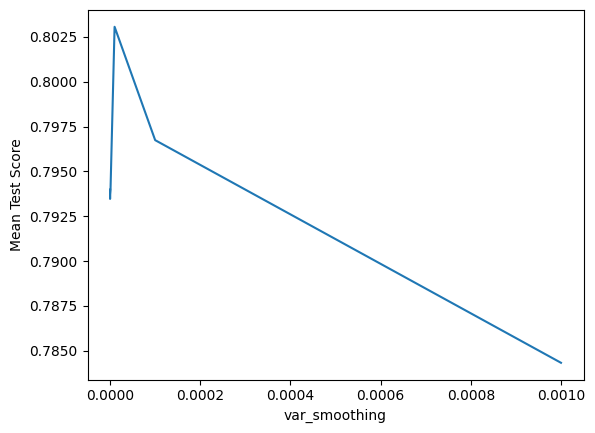

In [3]:
import seaborn as sns
# Create a dataframe to store the grid search results
df = pd.DataFrame(grid_search.cv_results_)

# Plot the mean test scores for each hyperparameter value
sns.lineplot(x='param_var_smoothing', y='mean_test_score', data=df)

# Set the plot title and axis labels
# plt.title('Grid Search Results')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Test Score')

# Display the plot
plt.show()      